## 1. Pratique des arbres de décision et hyper-paramètres optimaux

La documentation Scikit-Learn sur les Arbres de Décision se trouve ici : http://scikit-learn.org/stable/modules/tree.html

Cette partie du TDM se fait sur le jeu de données `digits`, à charger à l'aide de la fonction `sklearn.datasets.load_digits()`.

Seule cette partie 1 mène à la production d'un rapport de 3 à 4 pages maximum.

In [19]:
from sklearn.datasets import load_digits  #importation de la commande
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, f1_score

digits = load_digits()
X = digits.data
y = digits.target

Nous allons pratiquer trois aspects des arbres de décisions:
1. Visualiser un arbre
2. Etudier l'impact de la profondeur maximum de l'arbre à construire sur l'estimation de l'erreur réelle
3. Utiliser une grod search pour chercher les meilleures valeurs d'hyper-paramètres


### A) Echauffement

Maintenant qu'elles ont un format acceptable par scikit-learn, nous allons estimer une première fois le score de bonne classification (ou le taux d'erreurs). Nous allons utiliser la classe ``sklearn.tree.DecisionTreeClassifier`` qui contient tout ce qui est nécessaire pour la classification supervisée à l'aide d'arbres de décision.

Ecrire le code python permettant d'estimer le score de bonne classification d'une arbre de décision avec les paramètres par défaut de la classe ``DecisionTreeClassifier``, avec une validation croisée, sur le jeu de données digits.

In [20]:
# Initialisation du classificateur d'arbre de décision
clf = DecisionTreeClassifier()

# Validation croisée et estimation des scores
scores = cross_val_score(clf, X, y, cv=5)

# Affichage des scores pour chaque pli
print("Scores de validation croisée pour chaque pli :", scores)

# Affichage du score moyen
print("Score moyen de validation croisée :", scores.mean())

Scores de validation croisée pour chaque pli : [0.77222222 0.72222222 0.80222841 0.83844011 0.79108635]
Score moyen de validation croisée : 0.785239863819251


#### B) Affichage

L'avantage des arbres de décision, c'est qu'ils offrent une représentation graphique. Pour pouvoir l'afficher, nous allons utiliser les fonctionnalités de sklearn.tree.plot_tree, cf https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html.

Nous pouvons alors afficher tout arbre sklearn appris sur des données. Voyons un tel arbre s'afficher. Pour cela, nous devons au préalable apprendre un arbre (en effet, jusque là, nous n'avons fait des apprentissages que dans l'objectif d'estimer les performances du paramétrage par défaut de la classe).

**Q1** Produire le code permettant d'apprendre un arbre à partir de toutes les données disponibles dans l'échantillon, puis afficher cet arbre. Appelons le ``arbre_base``

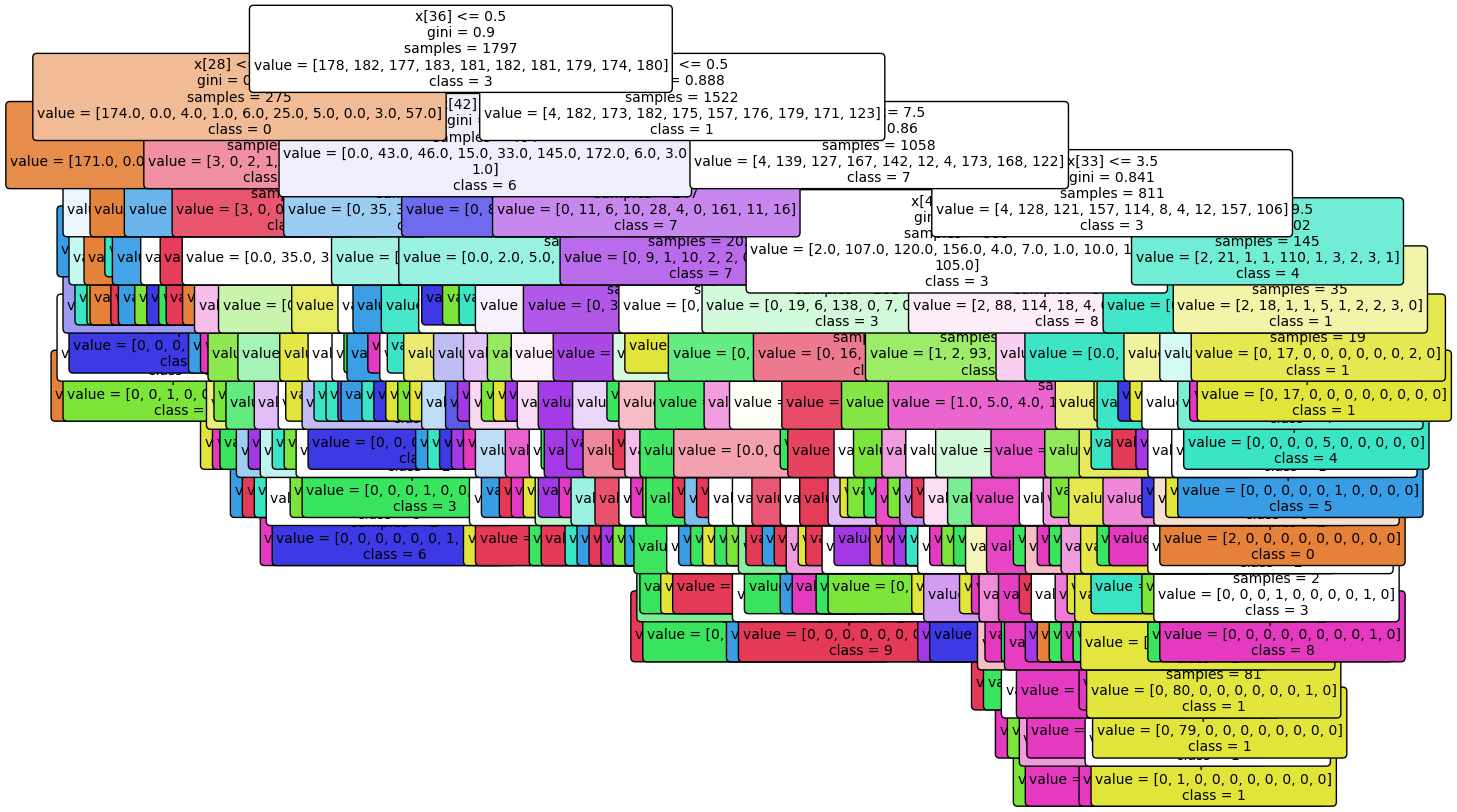

In [21]:
arbre_base = DecisionTreeClassifier()
# Entraînement de l'arbre avec toutes les données
arbre_base.fit(X, y)

# Création de la figure avec une taille ajustée
plt.figure(figsize=(15, 10))

# Affichage de l'arbre de décision
plot_tree(arbre_base, 
          max_depth=None, 
          feature_names=None,  
          class_names=[str(i) for i in range(10)],  
          label='all',  
          filled=True, 
          impurity=True,  
          rounded=True, 
          precision=3, 
          fontsize=10 
         )

# Affichage de l'arbre
plt.show()

**Q2** L'arbre ci-dessus est difficile à vosualiser car très grand. Pour mieux comprendre chaque noeud et feuille de l'arbre, limitons la profondeur de l'arbre à 3: réapprendre un ``petit_arbre`` sur digits, de profondeur maximum 3, et le visualiser. Etufier et comprendre les noeuds.

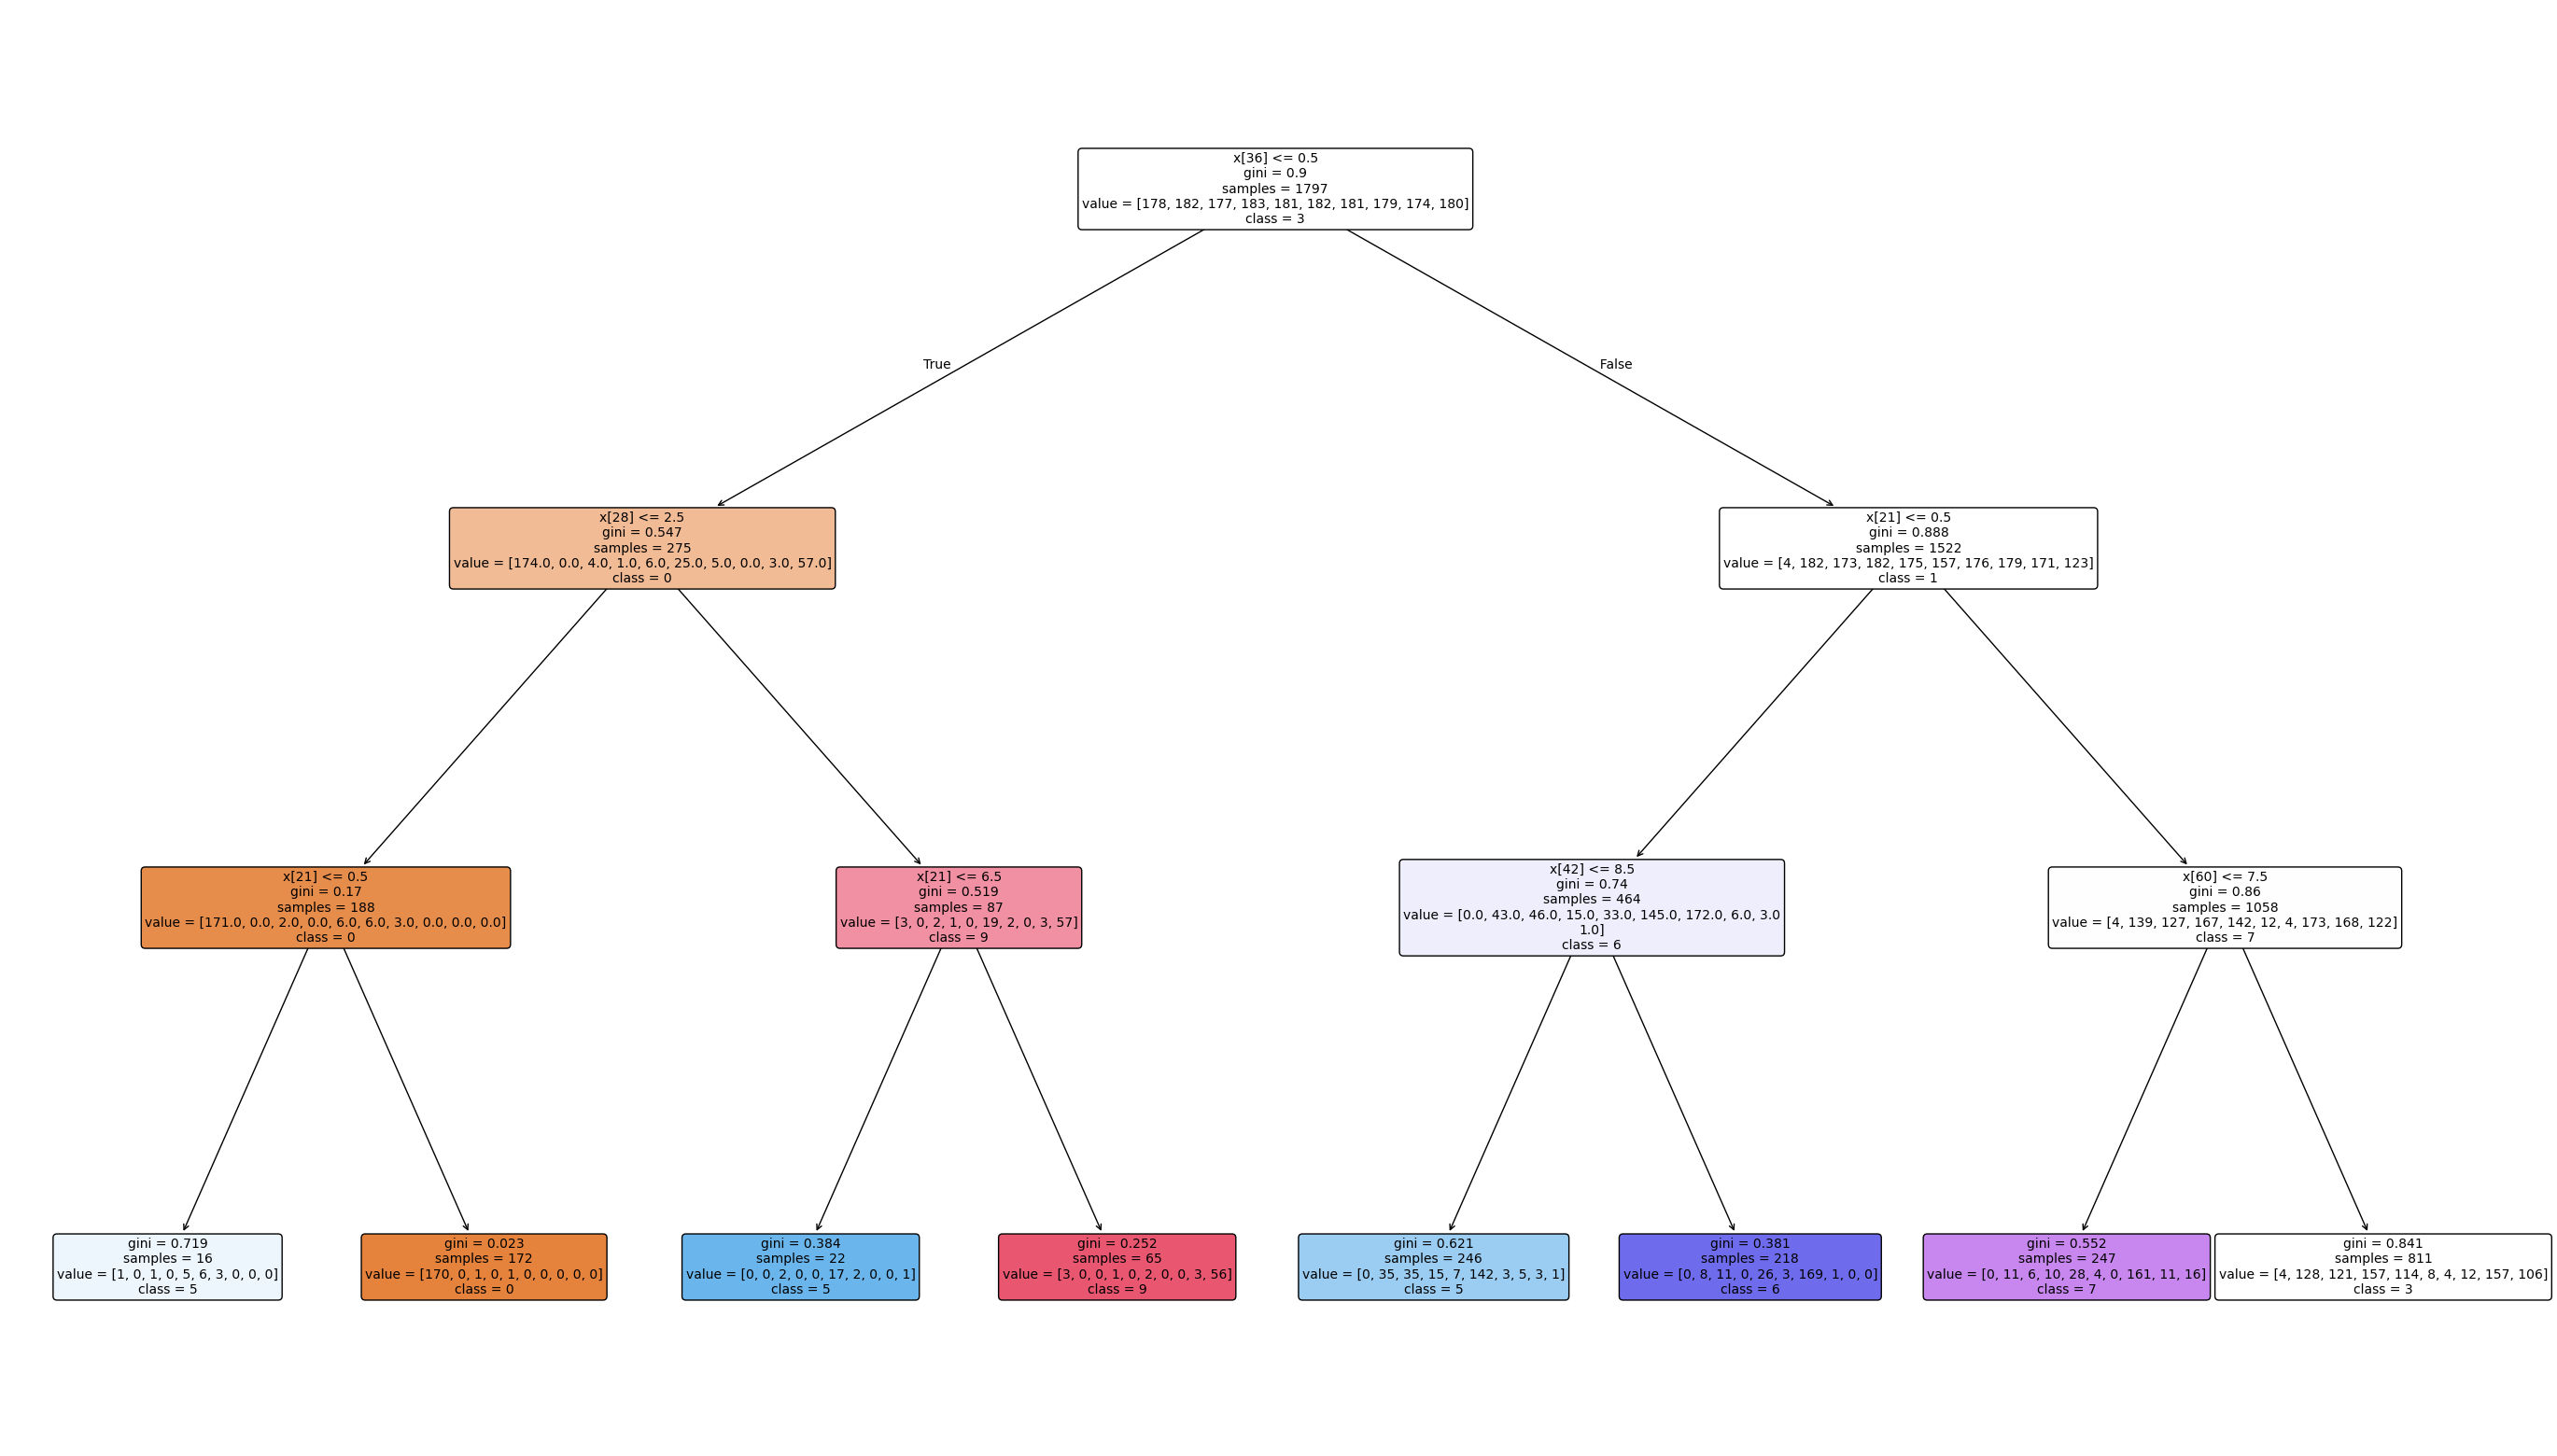

In [22]:
plt.figure(figsize=(35, 20))  

# Créer un arbre de décision avec une profondeur maximale de 3
petit_arbre = DecisionTreeClassifier(max_depth=3)

petit_arbre.fit(X, y)

# Affichage de l'arbre de décision avec des options ajustées
plot_tree(petit_arbre, 
          max_depth=None,
          class_names=[str(i) for i in range(10)], # Pas de limitation de profondeur
          filled=True,  # Remplir les nœuds
          rounded=True,  # Nœuds arrondis
          precision=3,  # Précision numérique
          fontsize=10 # Taille de police ajustée pour la lisibilité
         )

# Affichage de l'arbre
plt.show()

#### C) A la recherche des meilleures hyper-paramètres par validation croisée 

Il y a plus de 10 (hyper)-paramètres d'initialisation pour le classifieur. On se propose d'étudier l'impact de 3 d'entre eux  sur l'apprentissage :
- *criterion* qui par défaut vaut 'gini' mais peut-valoir aussi 'entropy'
- *max_depth* qui permet d'élaguer l'arbre en arrêtant l'appel récursif de l'algorithme d'apprentissage quand le noued courant est à cette profondeur
- *max_leaf_nodes* qui élague aussi l'arbre en ne gardant au maximum que ce nombre de feuilles (celles les plus pures, c'est à dire avec le moins de données de différentes classes)

Le critère de performance que nous observerons par la suite est le **F1-score**.

**Q3** Grâce à une validation croisée, procéder à une première estimation du F1-score d'un arbre de décision sur les données digits, en utilisant encore une fois le (hyper-)paramétrage par défaut de sklearn (comme dans Echauffement, mais sur le F1-score).

In [23]:
f1_scorer = make_scorer(f1_score, average = "macro")

# Estimation du F1-score avec validation croisée
f1_scores = cross_val_score(clf, X, y, cv=5, scoring=f1_scorer)

# Affichage des F1-scores pour chaque pli de validation croisée
print("F1-scores pour chaque pli de validation croisée :", f1_scores)

# Affichage du F1-score moyen
print("F1-score moyen :", f1_scores.mean())

F1-scores pour chaque pli de validation croisée : [0.79127028 0.69773029 0.79202952 0.84600474 0.7713436 ]
F1-score moyen : 0.7796756880387837


Maintenant que nous avons mesuré la qualité pour les valeurs par défaut des paramètres, nous allons réaliser de la **validation-croisée** sur l'ensemble d'apprentissage. 

Une fois qu'on aura trouvé les meilleures valeurs d'hyper-paramètres pour nos trois arguments choisi, on terminera par apprendre un arbre sur un sous-ensemble de l'échantillon d'apprentissage avec ces paramètres, on visualisera l'arbre et on évaluera la qualité de cet apprentissage final sur l'ensemble de test.

On commence par évaluer l'impact du critère de choix du test (*criterion*) :

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf_gini = DecisionTreeClassifier(criterion = 'gini')
reussite_gini = cross_val_score(clf_gini, X, y, cv = 10)
f1_gini = cross_val_score(clf_gini, X, y, cv = 10, scoring='f1_macro')
print("Pour le gini :\n \t taux de réussite : %f (+/-) %f\n \
      \t F-score (global) : %f (+/-) %f\n " 
      %(reussite_gini.mean(), reussite_gini.std(), f1_gini.mean(), f1_gini.std()) )

clf_entropy = DecisionTreeClassifier(criterion = 'entropy')
reussite_entropy = cross_val_score(clf_entropy, X, y, cv = 10)
f1_entropy = cross_val_score(clf_entropy, X, y, cv = 10, scoring='f1_macro')
print("Pour l'entropie :\n \t taux de réussite : %f (+/-) %f\n \
      \t F-score (global) : %f (+/-) %f\n " 
      %(reussite_entropy.mean(), reussite_entropy.std(), f1_entropy.mean(), f1_entropy.std()) )

Pour le gini :
 	 taux de réussite : 0.828575 (+/-) 0.032550
       	 F-score (global) : 0.826051 (+/-) 0.038537
 
Pour l'entropie :
 	 taux de réussite : 0.816918 (+/-) 0.054277
       	 F-score (global) : 0.821186 (+/-) 0.054763
 


Qu'en déduire ? Est-ce que l'entropie est statistiquement meilleure sur ce jeu de données ?


**Q4** Il faut maintenant regarder l'impact des 2 autres paramètres : 
- *max_depth* que l'on fera varier entre entre 1 et 20
- *max_leaf_nodes* qu'on veut faire varier entre 10 et 210 par paliers de 20 (c'est-à-dire 10, 30, .., 210).
On se propose d'étudier l'impact de ces paramètres de manière indépendante, avec l'entropie comme critère de sélection.

Il faudra produire 2 courbes montrant les évolutions du taux de réussite et du F1-score global avec chacun des hyper-paramètres. Il faudra aussi faire apparaitre l'écart type sur sur les courbes : l'utilisation de la fonction pyplot *errorbar* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html est vivement conseillée.

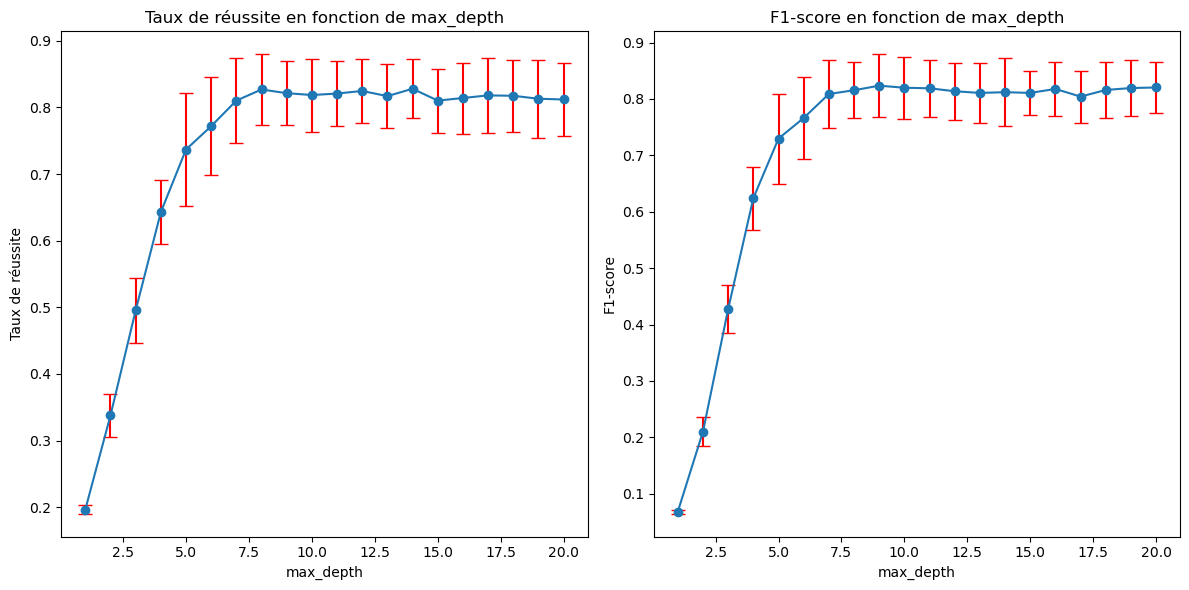

In [25]:
# évaluer l'impact de max_depth
# Paramètres de la validation croisée
cv = 10
f1_scorer = make_scorer(f1_score, average='macro')

# Gamme de valeurs pour max_depth
max_depth_range = range(1, 21)

# Stocker les résultats
mean_accuracy_depth = []
std_accuracy_depth = []
mean_f1_depth = []
std_f1_depth = []

# Boucle pour chaque valeur de max_depth
for depth in max_depth_range:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    
    # Calcul du taux de réussite
    scores_accuracy = cross_val_score(clf, X, y, cv=cv)
    mean_accuracy_depth.append(scores_accuracy.mean())
    std_accuracy_depth.append(scores_accuracy.std())
    
    # Calcul du F1-score
    scores_f1 = cross_val_score(clf, X, y, cv=cv, scoring=f1_scorer)
    mean_f1_depth.append(scores_f1.mean())
    std_f1_depth.append(scores_f1.std())

# Création des courbes pour max_depth
plt.figure(figsize=(12, 6))

# Courbe pour le taux de réussite
plt.subplot(1, 2, 1)
plt.errorbar(max_depth_range, mean_accuracy_depth, yerr=std_accuracy_depth, fmt='-o', ecolor='red', capsize=5)
plt.title('Taux de réussite en fonction de max_depth')
plt.xlabel('max_depth')
plt.ylabel('Taux de réussite')

# Courbe pour le F1-score
plt.subplot(1, 2, 2)
plt.errorbar(max_depth_range, mean_f1_depth, yerr=std_f1_depth, fmt='-o', ecolor='red', capsize=5)
plt.title('F1-score en fonction de max_depth')
plt.xlabel('max_depth')
plt.ylabel('F1-score')

plt.tight_layout()
plt.show()



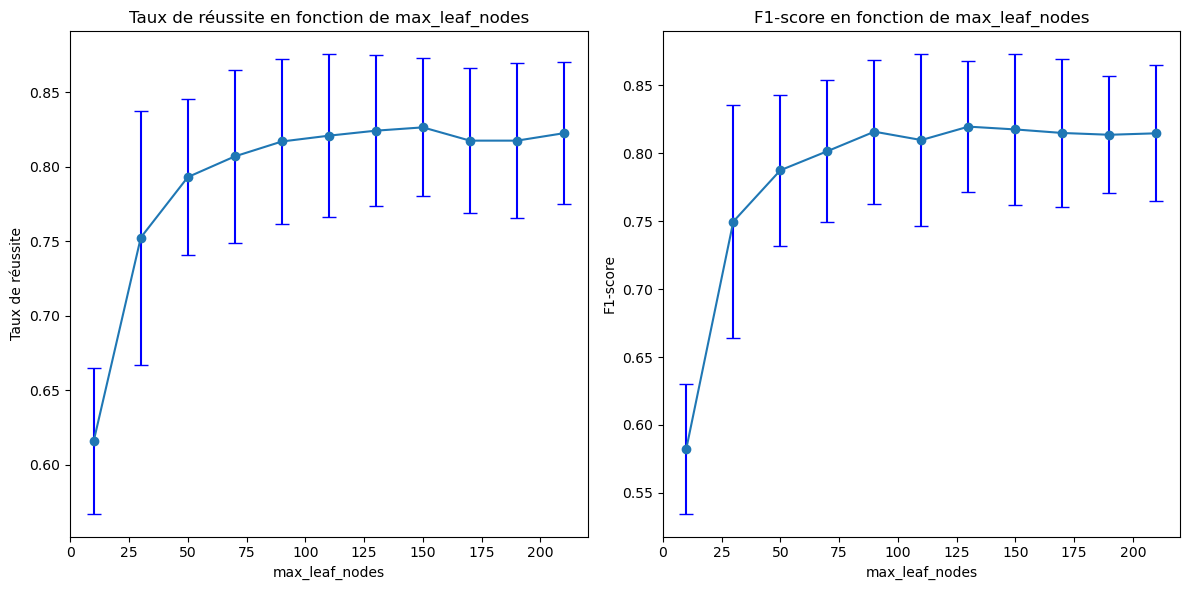

In [26]:
#évaluer l'impact de max_leaf_nodes
# Gamme de valeurs pour max_leaf_nodes
max_leaf_nodes_range = range(10, 211, 20)

# Stocker les résultats
mean_accuracy_leaf = []
std_accuracy_leaf = []
mean_f1_leaf = []
std_f1_leaf = []

# Boucle pour chaque valeur de max_leaf_nodes
for leaf_nodes in max_leaf_nodes_range:
    clf = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=leaf_nodes)
    
    # Calcul du taux de réussite
    scores_accuracy = cross_val_score(clf, X, y, cv=cv)
    mean_accuracy_leaf.append(scores_accuracy.mean())
    std_accuracy_leaf.append(scores_accuracy.std())
    
    # Calcul du F1-score
    scores_f1 = cross_val_score(clf, X, y, cv=cv, scoring=f1_scorer)
    mean_f1_leaf.append(scores_f1.mean())
    std_f1_leaf.append(scores_f1.std())

# Création des courbes pour max_leaf_nodes
plt.figure(figsize=(12, 6))

# Courbe pour le taux de réussite
plt.subplot(1, 2, 1)
plt.errorbar(max_leaf_nodes_range, mean_accuracy_leaf, yerr=std_accuracy_leaf, fmt='-o', ecolor='blue', capsize=5)
plt.title('Taux de réussite en fonction de max_leaf_nodes')
plt.xlabel('max_leaf_nodes')
plt.ylabel('Taux de réussite')

# Courbe pour le F1-score
plt.subplot(1, 2, 2)
plt.errorbar(max_leaf_nodes_range, mean_f1_leaf, yerr=std_f1_leaf, fmt='-o', ecolor='blue', capsize=5)
plt.title('F1-score en fonction de max_leaf_nodes')
plt.xlabel('max_leaf_nodes')
plt.ylabel('F1-score')

plt.tight_layout()
plt.show()


**Q5** En déduire les valeurs optimales (au sens du F1-score) des 3 hyper-paramètres, les utiliser pour (1) estimer le F1-score réel par validation croisée, puis (2) apprendre un arbre de décision final.

In [27]:
#on choisi les trois valeurs suivantes pour nos hyperparametre : criterion='entropy', max_leaf_nodes = 112, max_depth = 13

clf_optimal = DecisionTreeClassifier(criterion = 'entropy', max_depth = 13, max_leaf_nodes = 112)

f1_scorer = make_scorer(f1_score, average = "macro")

# Estimation du F1-score avec validation croisée
f1_scores = cross_val_score(clf_optimal, X, y, cv=5, scoring=f1_scorer)

# Affichage des F1-scores pour chaque pli de validation croisée
print("F1-scores pour chaque pli de validation croisée :", f1_scores)

# Affichage du F1-score moyen
print("F1-score moyen :", f1_scores.mean())

F1-scores pour chaque pli de validation croisée : [0.83080225 0.77213102 0.82283266 0.84294185 0.78404199]
F1-score moyen : 0.8105499530324295


**Q6** Visualiser l'arbre obtenu.

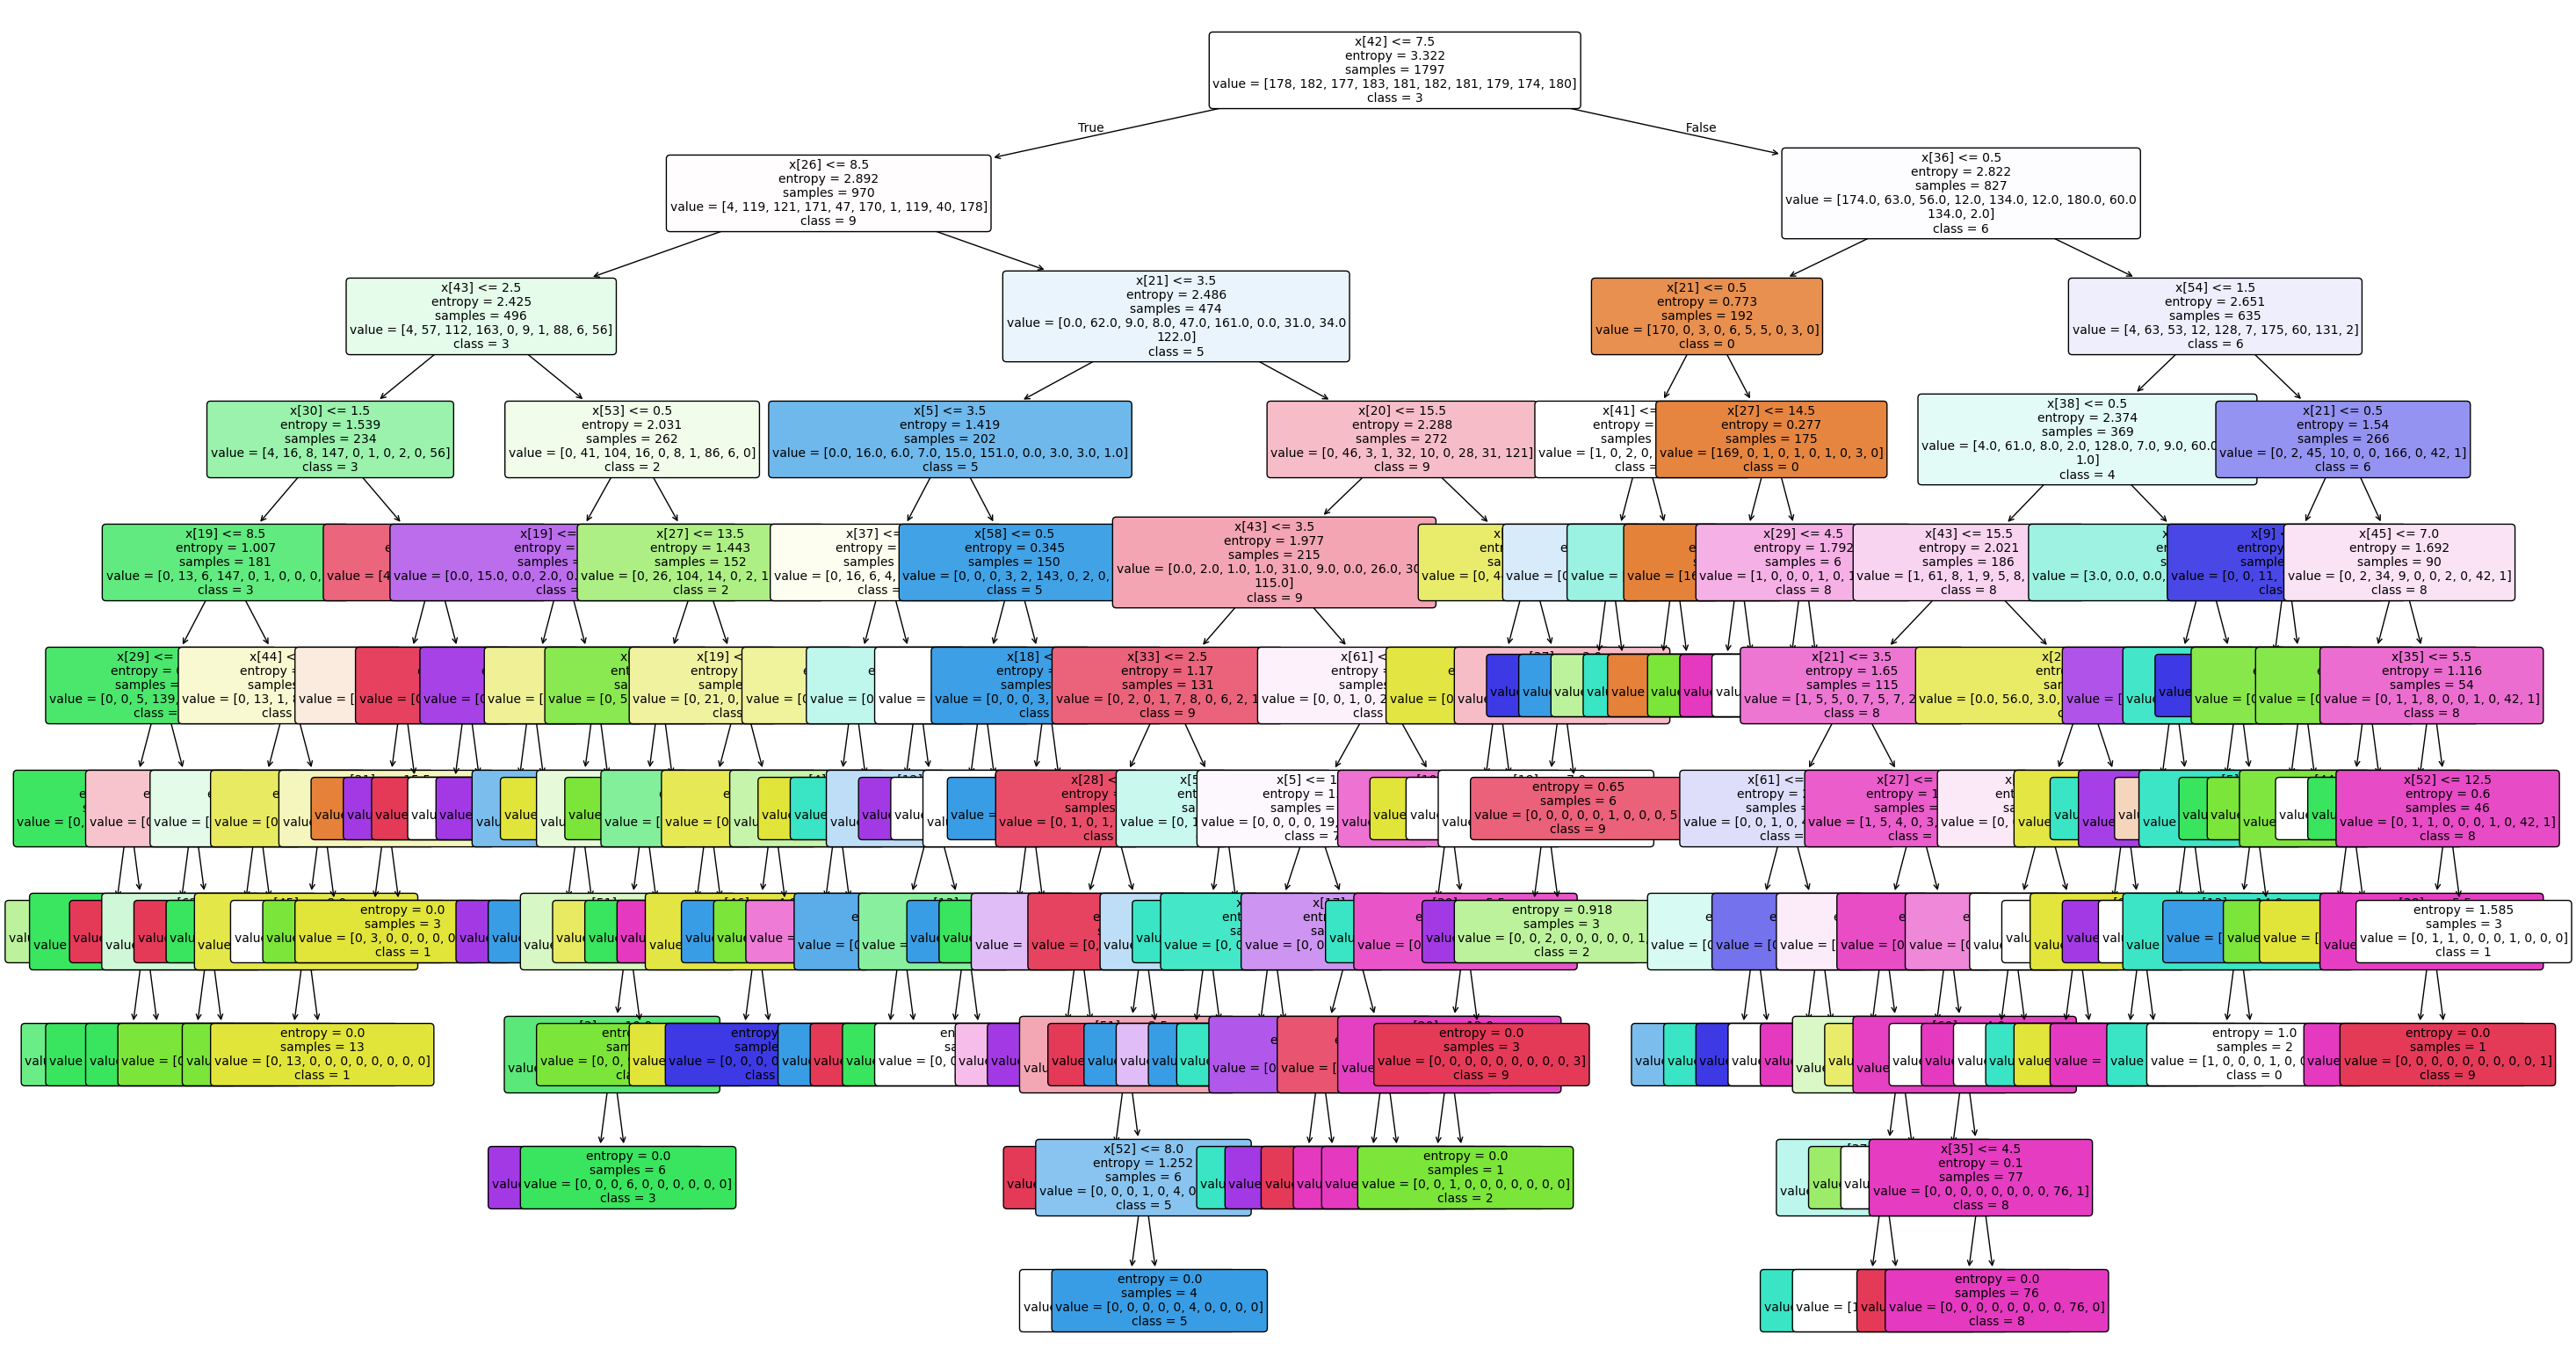

In [28]:
plt.figure(figsize=(35, 20))  

clf_optimal.fit(X, y)

# Affichage de l'arbre de décision avec des options ajustées
plot_tree(clf_optimal, 
          max_depth=None,
          class_names=[str(i) for i in range(10)], # Pas de limitation de profondeur
          filled=True,  # Remplir les nœuds
          rounded=True,  # Nœuds arrondis
          precision=3,  # Précision numérique
          fontsize=10 # Taille de police ajustée pour la lisibilité
         )

# Affichage de l'arbre
plt.show()

#### D) A la recherche des hyper-paramètres optimaux par grille de recherche

Il existe des procédés de recherche automatique des meilleurs hyper-paramètres d'un algorithme d'apprentissage, pour un échantillon donné. Le plus connu est la grille de recherche associée à la validation croisée : ``GridSearchCV``, qui permet d'obtenir la meilleure de toutes les combinaisons des hyper-paramètres à estimer (ici: entropie ou gini, profondeur maximum et nombre maximum de feuilles). 

**Q7** Quelle est l'instruction d'import pour disposer de cette classe qui vous simplifiera la vie ?

In [36]:
from sklearn.model_selection import GridSearchCV

Il est nécessaire d’indiquer dans un « dictionnaire » quels sont les hyper-paramètres dont on souhaite explorer les valeurs (pour trouver les optimales au sens d'un critère de performance) et quelles sont les différentes valeurs à évaluer. Chaque entrée du dictionnaire consiste en une chaîne de caractères qui contient le **nom de l’hyper-paramètre** tel qu’il est défini dans la classe implantant l’estimateur employé sous sklearn.

Par exemple, dans l'algorithme des $k$-plus proches voisins, les hyper-paramètres à optimiser peuvent être $k$ et la distance pour calculer la similarité entre exemples. Cela donnerait, comme dictionnaire de recherche en grille (nous reconnaissons les noms des paramètres de la classe KNearestNeighbors):

In [37]:
tuned_parameters = {'n_neighbors':[2, 5, 10, 15],
                    'p':   [0.5, 1, 2, 5, 8, 12]}

Evidemment, la plage de valeurs que chaque hyper-paramètre peut prendre peut être fournie autrement que de la façon énumérative comme ci-dessus (il suffit que le domaine spécifié de valeurs soit itérable: une liste, un tableau, etc.).

**Q8** Donner le code qui permet de spécifier le dictionnaire de recherche propre à l'optimisation des **hyper-paramètres des arbres de décisions** à apprendre sur les donnés digits.

In [38]:
param_grid = {
    'criterion': ['entropy', 'gini'],  # Critère de sélection
    'max_depth': range(1, 21),  # Profondeurs maximales de 1 à 20
    'max_leaf_nodes': range(10, 221, 20)  # Feuilles maximales de 10 à 210 par paliers de 20
}


Dans la création de l'instance de ``GridSearchCV`` nous pouvons ensuite indiquer pour ``DecisionTreeClassifier`` des arguments qui seront communs (fixes) pour chaque entraînement, par exemple nous pouvons fixer l'hyper-paramètre ``min_samples_split`` à 3 (au lieu de la valeur par défaut à 2). 

De façon générale, le data scientist peut fixer tout hyper-paramètre $\alpha$ propre à un algorithme, et une fois fixé, chercher la meilleure combinaison des autres $\alpha$ fixe. Bien évidemment, il est possible de figer plusieurs autres hyper-paramètres, pour chercher à en optimiser d'autres. 

In [39]:
select_hppmt = GridSearchCV(DecisionTreeClassifier(min_samples_split=3), param_grid, cv=5)

**Q9** Si vous avez bien lu l'énoncé, qu'indique l'argument ``cv`` dans l'appel ci-dessus ? Si vous ne pouvez pas répondre à cette question, c'est que vous avez lu trop vite le début de cet exercice : recommencez.

Quand scikit-learn cherche à interpréter l'expressions suivante :

``select_hppmt.fit(X, y)``

Alors les actions suivantes sont réalisées :

- à partir des listes de valeurs pour les différents (hyper)paramètres,  sont générées toutes les combinaisons de valeurs
- pour chaque combinaison, les performances des modèles correspondants sont évaluées par validation croisée 5-fold (appliquée uniquement sur les données d’apprentissage X, y),
- sont sélectionnées les valeurs des (hyper)paramètres correspondant aux meilleures performances de validation croisée,
- avec ces valeurs pour les (hyper)paramètres un nouvel apprentissage est réalisé avec la totalité des données de X, y (et non seulement k− 1k folds).

Indiquez et exécutez les instructions pour faire cette recherche d'hyper-paramètres optimaux ** au sens du F1-score** avec le dictionnaire défini.

In [40]:
# Initialiser GridSearchCV avec le modèle, le param_grid et le F1-score comme métrique
f1_scorer = make_scorer(f1_score, average='macro')  # Choix de l'average 'macro' pour le F1-score

# Exécuter la recherche
select_hppmt.fit(X, y)

# Afficher les meilleurs paramètres et le score associé
print("Meilleurs paramètres :", select_hppmt.best_params_)
print("Meilleur F1-score moyen :", select_hppmt.best_score_)    

Meilleurs paramètres : {'criterion': 'entropy', 'max_depth': 19, 'max_leaf_nodes': 190}
Meilleur F1-score moyen : 0.8180594243268338


/Users/selmafanani/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Les lignes suivantes permettent d’afficher les résultats : les paramètres du meilleur modèle avec ``best_params_``, ainsi que les résultats de validation croisée obtenus pour toutes les combinaisons de valeurs pour les (hyper)paramètres (``cv_results_``) donne accès à ces informations et à bien d’autres).

In [41]:
print(select_hppmt.best_params_)
print(select_hppmt.cv_results_)

{'criterion': 'entropy', 'max_depth': 19, 'max_leaf_nodes': 190}
{'mean_fit_time': array([0.00387249, 0.00259247, 0.00249195, 0.0020906 , 0.00182562,
       0.00163074, 0.00153804, 0.00153484, 0.00153427, 0.00152388,
       0.00154033, 0.00283203, 0.00283642, 0.00282269, 0.00282841,
       0.00282331, 0.00283546, 0.00283694, 0.0028358 , 0.00282345,
       0.0028307 , 0.00283628, 0.00422058, 0.00422583, 0.00423198,
       0.00423126, 0.00423326, 0.00422192, 0.00423484, 0.00421834,
       0.00423384, 0.00424037, 0.00423474, 0.00565557, 0.00575185,
       0.0057703 , 0.0057425 , 0.005758  , 0.00575337, 0.00574789,
       0.00573912, 0.00575066, 0.00578246, 0.00577111, 0.00644264,
       0.00743613, 0.00745611, 0.00746722, 0.00746007, 0.0074234 ,
       0.0074358 , 0.00744057, 0.00743842, 0.00745554, 0.00745168,
       0.00647616, 0.00868087, 0.00887742, 0.00887985, 0.00888314,
       0.00887818, 0.00888319, 0.00890174, 0.00886884, 0.0088726 ,
       0.00890069, 0.00647697, 0.00931053, 0.0

**Q10** combien d'arbres ont été appris au total pour faire cette grid-search? Quel est le meilleur F1-score ?

In [51]:
import pandas as pd

# Définir le modèle de décision
model = DecisionTreeClassifier(min_samples_split=3)

# Définir la grille d'hyperparamètres
param_grid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': range(1, 21),
    'max_leaf_nodes': range(10, 221, 20)
}

# Initialiser GridSearchCV avec la validation croisée à 5 plis
select_hppmt_0 = GridSearchCV(model, param_grid, scoring='f1_macro', cv=5)

# Exécuter la Grid Search sur le modèle
select_hppmt_0.fit(X, y)

# Extraire les paramètres et les scores de `cv_results_`
df_results = pd.DataFrame(select_hppmt_0.cv_results_)

# Trier par F1-score (mean_test_score) de manière décroissante
top_5_results = df_results[['param_criterion', 'param_max_depth', 'param_max_leaf_nodes', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False).head(5)


print("Les 5 meilleures combinaisons d'hyperparamètres :")
print(top_5_results)

Les 5 meilleures combinaisons d'hyperparamètres :
    param_criterion  param_max_depth  param_max_leaf_nodes  mean_test_score
161         entropy               15                   150         0.815657
149         entropy               14                   130         0.814605
119         entropy               11                   190         0.814011
140         entropy               13                   170         0.813313
195         entropy               18                   170         0.811261


/Users/selmafanani/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


### L’aspect des résultats vous incite à affiner la grille ? 

**Q11** Si vous le pensez nécessaire, modifiez la grille, relancez une GridSearchCV et examinez les nouveaux résultats.
(Il faut affiner les valeurs cibles des hyper-paramètres optimaux, en recentrant leurs domaines de valeurs autour des meilleures)

In [54]:
# Définir le modèle de décision
model_1 = DecisionTreeClassifier(min_samples_split=3)

# Définir la grille d'hyperparamètres en prenant les valeurs qui avaient données les meilleurs résultats 
param_grid1 = {
    'criterion': ['entropy'],
    'max_depth': [ 11, 12, 13, 14, 15, 16, 17, 18],
    'max_leaf_nodes': [130, 150, 170, 190]
}

# Initialiser GridSearchCV avec la validation croisée à 5 plis
select_hppmt_1 = GridSearchCV(model_1, param_grid1, scoring='f1_macro', cv=5)

# Exécuter la Grid Search sur le modèle
select_hppmt_1.fit(X, y)

# Récupérer les nouveaux résultats de la GridSearchCV
cv_results = pd.DataFrame(select_hppmt_1.cv_results_)

# Trier les résultats par F1-score moyen décroissant
sorted_cv_results = cv_results.sort_values(by='mean_test_score', ascending=False)

# Afficher les 5 meilleures combinaisons d'hyperparamètres
top_5_results = sorted_cv_results[['param_criterion', 'param_max_depth', 'param_max_leaf_nodes', 
                                   'mean_test_score']].head(5)

print("Les 5 meilleures combinaisons d'hyperparamètres :")
print(top_5_results)

Les 5 meilleures combinaisons d'hyperparamètres :
   param_criterion  param_max_depth  param_max_leaf_nodes  mean_test_score
10         entropy               13                   170         0.818046
20         entropy               16                   130         0.811880
2          entropy               11                   170         0.810518
0          entropy               11                   130         0.809420
9          entropy               13                   150         0.809073


**Pour les curieux** Il existe d'autres méthodes pour chercher les hyper-paramètres, notamment les recherches aléatoires d'hyper-paramètres.

Se documenter sur ``RandomizedSearchCV``. Le « budget » (nombre total de combinaisons évaluées) peut être fixé avec n_iter. Motivez le choix des lois employées pour le tirage des valeurs des deux (hyper)paramètres  (les distributions peuvent être choisies dans cette liste de scipy.stats.). Adapter le code précédent pour cet autre type de recherche d'hyper-paramètres optimaux, en comparant temps d'exécution de la grid search (et/ou nombre d'arbrers appris) et qualité des résultats.

In [56]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
import time

# Définir le modèle de décision
model_2 = DecisionTreeClassifier(min_samples_split=3)

# Définir la grille d'hyperparamètres pour RandomizedSearchCV
param_dist = {
    'criterion': ['entropy'], 
    'max_depth': randint(8, 13), 
    'max_leaf_nodes': randint(130, 200) 
}
# Initialiser RandomizedSearchCV avec la validation croisée à 5 plis
random_search = RandomizedSearchCV(model_2, param_dist, n_iter=40, scoring='f1_macro', cv=5, random_state=42)

# Exécuter la Randomized Search
start_time = time.time()  # Démarrer le chronométrage
random_search.fit(X, y)
end_time = time.time()  # Fin du chronométrage

# Temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution de RandomizedSearchCV : {execution_time:.2f} secondes")

# Afficher les meilleurs paramètres et le score
print("Meilleurs paramètres avec RandomizedSearchCV :", random_search.best_params_)
print("Meilleur F1-score moyen avec RandomizedSearchCV :", random_search.best_score_)


Temps d'exécution de RandomizedSearchCV : 2.41 secondes
Meilleurs paramètres avec RandomizedSearchCV : {'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 188}
Meilleur F1-score moyen avec RandomizedSearchCV : 0.8175808626045894


## 2. Le Titanic (optionnel mais très formateur)

**Pour celles et ceux qui veulent aller plus loin en récapitulant tout ce qui a été vu jusque là.**

Récupérer le jeu de données Titanic, qui décrit plusieurs centaines de passagers selon différentes informations (nom, numéro de cahine, tarif, classe dans le bateau, port d'embarquiement, genre, age, nombre de compagnons de voyage, etc.), et indique pour chaque passager s'il est décédé ou pas dans la catastrophe du Titanic en 1912.

On cherche à apprendre un modèle qui, à partir des informations sur un passager parmi les 3000 embarqués, prédit si ce passager est mort ou pas dans le naufrage (un passager autre que celui de l'échantillon d'apprentissage).

A. Etudier ce jeu de données, repérer les soucis (valeurs manquantes, etc.), transformer des valeurs ordinales en entier, travailler les attributs binaires pour les représenter correctement, repérer (en justifiant) des colonnes potentiellement non informatives au regard de la tâche, etc.

B. Construire le meilleur arbre de décision possible sur ce jeu de données (meilleurs hyper-paramètres)

C. Visualiser l'arbre obtenu sur tout le jeu de données avec ces hyper-paramètres.